# Exercise 2.5:
![Exercise 2.5](images/Exercise2.5-Sutton.jpeg)

In [1]:
import numpy as np

class Bandit:
    
    def __init__(self, mu = 1, k = 10):
        """
        By default creates an array of size k and mean of 1 which represents the q*(a).
        In every step it changes a little based on a random walk algorithm.
        """
        self.Qstars = np.ones(k) * mu
        #print(self.Qstars)
        
    def __step(self):
        for i in range(0, len(self.Qstars)):
            self.Qstars[i] += np.random.normal(0, 0.01)
        #print(self.Qstars)
            
    def pull_a_bandit(self, lever):
        if lever < len(self.Qstars) and lever >=0:
            reward = np.random.normal(self.Qstars[lever], 1)
            self.__step()
            return reward
        else:
            raise Exception(f"Number {lever} out of range")
            
    def print_bandit_content(self):
        print(self.Qstars)

```python
# The way to run the bandit
bandit = Bandit()

for i in range(1000):
    x = bandit.pull_a_bandit(7)
    print("x = ",x)
    bandit.print_bandit_content()
```

In [2]:
class Bandit_Agent:
    
    def __init__(self, bandit):
        self.action_values = np.zeros(10) # Q(a)
        self.counts = np.zeros(10) # N(a)
        self.iteration_number = 0
        self.total_reward = 0
        self.bandit = bandit
        
    def greedy_update(self):
        self.iteration_number += 1
        action_index = np.argmax(self.action_values) # Choose the best action
        reward = self.bandit.pull_a_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + (reward - self.action_values[action_index])/self.counts[action_index]
        return self.total_reward/self.iteration_number
    
    def epsilon_greedy_update(self, epsilon=0.01):
        self.iteration_number += 1
        if np.random.rand() > epsilon:
            action_index = np.argmax(self.action_values) # Choose the best action
        else:
            action_index = np.random.randint(0,10) # Choose a random action
        reward = self.bandit.pull_a_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + (reward - self.action_values[action_index])/self.counts[action_index]
        return self.total_reward/self.iteration_number
    
    def epsilon_greedy_constant_update(self, epsilon=0.1, alpha=0.1):
        self.iteration_number += 1
        if np.random.rand() > epsilon:
            action_index = np.argmax(self.action_values) # Choose the best action
        else:
            action_index = np.random.randint(0,10) # Choose a random action
        reward = self.bandit.pull_a_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + alpha * (reward - self.action_values[action_index])
        return self.total_reward/self.iteration_number
        
    def obj_print(self):
        print(f"{self.action_values},avg_reward={self.total_reward/self.iteration_number},best_action={self.best_action()}")
        
    def best_action(self):
        return np.max(self.action_values)

In [3]:
agent_greedy_bandit = Bandit()
agent_greedy = Bandit_Agent(bandit = agent_greedy_bandit)

agent_epsilon_bandit = Bandit()
agent_epsilon = Bandit_Agent(bandit = agent_epsilon_bandit)

agent_constant_update_bandit = Bandit()
agent_constant_update = Bandit_Agent(bandit = agent_constant_update_bandit)

EPOCHS = 10000
greedy_rewards = np.zeros(EPOCHS)
epsilon_greedy_rewards = np.zeros(EPOCHS)
epsilon_greedy_constant_rewards = np.zeros(EPOCHS)
for i in range(0,EPOCHS):
    greedy_rewards[i] = agent_greedy.greedy_update()
    epsilon_greedy_rewards[i] = agent_epsilon.epsilon_greedy_update(epsilon=0.1)
    epsilon_greedy_constant_rewards[i] = agent_constant_update.epsilon_greedy_constant_update(epsilon=0.1, alpha=0.1)

In [4]:
agent_greedy.obj_print()
agent_epsilon.obj_print()
agent_constant_update.obj_print()

[1.16471275 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ],avg_reward=1.1647127537155393,best_action=1.1647127537155477
[0.47319347 0.39479877 1.01800633 0.71620168 0.85174259 0.31884649
 0.21377111 2.01686392 1.01615836 0.52393892],avg_reward=1.2740730332968637,best_action=2.016863922446111
[-0.10576477  1.81435722 -0.16459183  1.2271202   0.60460009 -0.58333646
  1.08402169 -0.23903295  0.2325135  -0.15110368],avg_reward=1.2687301103871427,best_action=1.8143572209505239


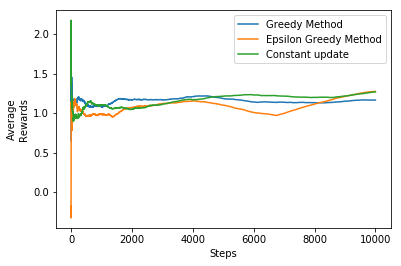

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0, EPOCHS)
greedy_plot, = plt.plot(x,greedy_rewards[x])
epsilog_greedy, = plt.plot(x,epsilon_greedy_rewards[x])
epsilon_greedy_constant, = plt.plot(x,epsilon_greedy_constant_rewards[x])
plt.xlabel("Steps")
plt.ylabel("Average\nRewards")
plt.legend([greedy_plot,epsilog_greedy, epsilon_greedy_constant],["Greedy Method", "Epsilon Greedy Method", "Constant update"])
plt.show()

In [6]:
# Averaging over a lot of Runs
import time

RUNS = 2000   # Following Sutton's example (stated under Figure 2.2)
EPOCHS = 10000 # Initially 10000

greedy_rewards = np.zeros((RUNS, EPOCHS))                 # For a_greedy
epsilon_greedy_rewards = np.zeros((RUNS, EPOCHS))         # For a_epsilon
epsilon_greedy_constant_rewards = np.zeros((RUNS, EPOCHS)) # For a_epsilon_constant

stime = time.time()
for i in range(0, RUNS):
    agent_greedy_bandit = Bandit()
    agent_greedy = Bandit_Agent(bandit = agent_greedy_bandit)

    agent_epsilon_bandit = Bandit()
    agent_epsilon = Bandit_Agent(bandit = agent_epsilon_bandit)

    agent_constant_update_bandit = Bandit()
    agent_constant_update = Bandit_Agent(bandit = agent_constant_update_bandit)
    for j in range(0,EPOCHS):
        greedy_rewards[i,j] = agent_greedy.greedy_update()
        epsilon_greedy_rewards[i,j] = agent_epsilon.epsilon_greedy_update(epsilon=0.1)
        epsilon_greedy_constant_rewards[i,j] = agent_constant_update.epsilon_greedy_constant_update(epsilon=0.1, alpha=0.1)
etime = time.time()
print("It took {} seconds to run this cell".format(etime - stime))

It took 3768.8736186027527 seconds to run this cell


In [7]:
# Processing collected rewards for chart

greedy_rewards_mean = np.zeros(EPOCHS)
greedy_rewards_std = np.zeros(EPOCHS)

epsilon_greedy_rewards_mean = np.zeros(EPOCHS)
epsilon_greedy_rewards_std = np.zeros(EPOCHS)

epsilon_greedy_constant_rewards_mean = np.zeros(EPOCHS)
epsilon_greedy_constant_rewards_std = np.zeros(EPOCHS)


for ep in range(0,EPOCHS):
    greedy_rewards_mean[ep] = greedy_rewards[0:RUNS, ep].mean()
    greedy_rewards_std[ep] = greedy_rewards[0:RUNS, ep].std()

    epsilon_greedy_rewards_mean[ep] = epsilon_greedy_rewards[0:RUNS, ep].mean()
    epsilon_greedy_rewards_std[ep] = epsilon_greedy_rewards[0:RUNS, ep].std()

    epsilon_greedy_constant_rewards_mean[ep] = epsilon_greedy_constant_rewards[0:RUNS, ep].mean()
    epsilon_greedy_constant_rewards_std[ep] = epsilon_greedy_constant_rewards[0:RUNS, ep].std()

C:\Users\farha\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


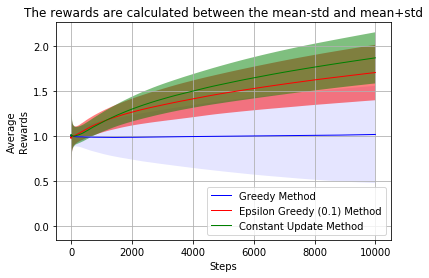

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# Charting them
x = np.arange(0, EPOCHS)
fig, ax = plt.subplots(1)
ax.plot(x, greedy_rewards_mean, lw=1, label='Greedy Method', color='blue', ls='-')
ax.fill_between(x, greedy_rewards_mean - greedy_rewards_std, # Lower bound
                greedy_rewards_mean + greedy_rewards_std, # Upper bound
                facecolor='blue', alpha=0.1)
ax.plot(x, epsilon_greedy_rewards_mean, lw=1, label='Epsilon Greedy (0.1) Method', color='red', ls='-')
ax.fill_between(x, epsilon_greedy_rewards_mean - epsilon_greedy_rewards_std, # Lower bound
                epsilon_greedy_rewards_mean + epsilon_greedy_rewards_std, # Upper bound
                facecolor='red', alpha=0.5)
ax.plot(x, epsilon_greedy_constant_rewards_mean, lw=1, label='Constant Update Method', color='green', ls='-')
ax.fill_between(x, epsilon_greedy_constant_rewards_mean - epsilon_greedy_constant_rewards_std, # Lower bound
                epsilon_greedy_constant_rewards_mean + epsilon_greedy_constant_rewards_std, # Upper bound
                facecolor='green', alpha=0.5)
ax.legend(loc='lower right')

ax.set_xlabel('Steps')
ax.set_ylabel('Average\nRewards')
ax.set_title("The rewards are calculated between the mean-std and mean+std")
ax.grid()
fig.show()